# Определение перспективного тарифа для телеком компании

### Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание последовательности действий

#### Шаг 1. Откройте файл с данными и изучите общую информацию

#### Шаг 2. Подготовьте данные
- Изменения типа данных
- Поиск и исправление ошибок в данных
- Подсчет для каждого пользователя:
- Количество совершенных звонков и минут разговоров за месяц;
- Количество отправленных сообщений по месяцам;
- Ежемесячный трафик интернет-трафика;-- Ежемесячный доход с каждого пользователя

#### Шаг 3. Анализ данных
- Описание поведения оператора клиента на основе выборки
- Расчет среднего количества, дисперсии и стандартного отклонения
- Распределение гистограмм
- Описание полученных распределений

#### Шаг 4. Проверка гипотез
-  Гипотеза 1. Средний доход пользователей тарифов «Ультра» и «Смарт» различен
-  Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

#### Шаг 5. Общий вывод

### Описание данных
Пять таблиц предоставлены для анализа. Данные более подробно описаны в ТЗ проектного задания.

Из таблиц, представленных для анализа, можно сделать несколько выводов:

В таблицах вызовов, сообщений и интернировщиков вам обязательно нужно переименовать идентификатор столбца. Поскольку при объединении таблиц мы теряемся в трех абсолютно одинаковых именованных столбцах. - в таблице звонки id => id_calls - в таблице сообщения id => id_messages - в таблице интернет id => id_internet
В таблицах тарифов и пользователей есть название тарифа, вам необходимо переименовать столбец Tar_name в таблице тарифов. Таким образом, у нас будут столбцы с одинаковыми именами в других таблицах. - в таблице тариф имя_тарифа => тариф

# Шаг 1. Изучение общей информации

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [178]:
data_users = pd.read_csv("/datasets/users.csv")
data_tariffs = pd.read_csv("/datasets/tariffs.csv")
data_calls = pd.read_csv("/datasets/calls.csv")
data_internet = pd.read_csv("/datasets/internet.csv")
data_messages = pd.read_csv("/datasets/messages.csv")

#### 1. Таблица users (информация о пользователях):

In [179]:
data_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [180]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [181]:
data_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [182]:
data_users.duplicated().sum()

0

In [183]:
data_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

В таблице пользователей 8 столбцов, 500 строк.
В двух столбцах таблицы необходимо изменить тип данных:
- churn_date object => datetime
- reg_date object => datetime

Все представленные столбцы таблицы имеют пропущенные значения, они должны быть обработаны.
Из 500 пользователей 351 пользователь использует тариф Smart, 149 пользователей использует тариф Ultra.

#### 2. Таблица tariffs (информация о тарифах):

In [184]:
data_tariffs.head(10)

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [185]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [186]:
data_tariffs.isna().sum()

messages_included        0
mg_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [187]:
data_tariffs.duplicated().sum()

0

В таблице тарифов 8 столбцов, 2 строки. Это связано с тем, что мы рассматриваем только два тарифных плана: Smart и Ultra. В двух столбцах таблицы нет необходимости изменять типы данных. Необходимо изменить только имя столбца:
- tariff_name =>tariff

Все представленные столбцы таблицы имеют пропущенные значения, они должны быть обработаны.

#### 3. Таблица calls (информация о звонках):

In [188]:
data_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [189]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [190]:
data_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [191]:
data_calls.duplicated().sum()

0

Таблица вызывает 4 столбца, 202 607 строк.
В двух столбцах таблицы необходимо изменить тип данных:
- call_date object => datetime

Все представленные столбцы таблицы имеют пропущенные значения, они должны быть обработаны.
47 927 звонков имеют продолжительность менее 1 минуты. Чтобы не потерять около 20% данных нам нужно:

- Примените метод np.ceil, чтобы указать продолжительность телефонного звонка. Функции np.ceil вернут нам верхнее ближайшее (округленное) значение в минутах;
- Мы заменим нулевую продолжительность вызова на 1 минуту, поскольку минута является минимальным значением сеанса вызова для оператора, я не думаю, что это вызовет большой уклон в данных.

#### 4. Таблица internet (информация об интернет-сессиях):

In [192]:
data_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [193]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [194]:
len(data_internet.query('mb_used < 1'))

19699

In [195]:
data_internet.isna().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [196]:
data_internet.duplicated().sum()

0

В таблице интернет 4 столбца, 149 396 строк.
В двух столбцах таблицы необходимо изменить тип данных:
- session_date object => datetime

Все представленные столбцы таблицы имеют пропущенные значения, они должны быть обработаны.

В столбце mb_used - объем интернет-трафика, потраченного за сеанс в мегабайтах, а в описании тарифа в таблице тарифов столбец данных mg_per_month_included в гигабайтах. Чтобы понять, в какой момент пользователь будет использовать объем интернет-трафика в соответствии со своим тарифом, нам необходимо представить данные об объеме затраченного трафика в формате гигабайта, чтобы мы могли рассчитать, сколько пользователь потратил.

На 19 699 интернет-сессий расходуется менее 1 МБ интернет-трафика за одну сессию. Как и в случае звонков, оператор округляет значения в мегабайтах. Поэтому необходимо:
- Примените метод np.ceil, чтобы указать продолжительность интернет-сессий. Функции np.ceil вернут нам верхнее ближайшее (округленное) значение в мб;
- Мы заменим нулевую продолжительность интернет-сессий на 1 минуту, так как минута является минимальным значением интернет-сессии для оператора, я не думаю, что это приведет к большому уклону данных

#### 5. Таблица internet (информация об интернет-сессиях):

In [197]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [198]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [199]:
data_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [200]:
data_messages.duplicated().sum()

0

В таблице тарифов 8 столбцов, 2 строки. Это связано с тем, что мы рассматриваем только два тарифных плана: Smart и Ultra. В двух столбцах таблицы нет необходимости изменять типы данных. Необходимо изменить только имя столбца:
- tariff_name => tariff

Все представленные столбцы таблицы имеют пропущенные значения, они должны быть обработаны.

# Шаг 2. Предварительная обработка данных

## Изменения типа данных

#### Изменить тип данных
Давайте приведем данные к необходимым типам. При изучении информации из таблиц мы обнаружили, что нам необходимо изменить тип данных в следующих таблицах и столбцах:
- Таблица data_users      - churn_date object => datetime      - reg_date object => datetime
- Таблица data_calls      - call_date object => datetime
- Таблица data_messages      - message_date object => datetime
- Таблица data_internet      - session_date object => datetime

In [201]:
dateformat = '%Y-%m-%d'

def to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col], format=dateformat)

to_datetime(data_users, ['churn_date'])
to_datetime(data_users, ['reg_date'])
to_datetime(data_calls, ['call_date'])
to_datetime(data_messages, ['message_date'])
to_datetime(data_internet, ['session_date'])

#### Поиск и исправление ошибок в данных

#### Восстановить упущения

В таблицах data_calls и data_internet есть данные, которые нам нужно обработать, нам нужно:
- В таблице data_calls - применить метод np.ceil для знака длительности телефонного звонка. Функции np.ceil вернет нам верхнее ближайшее (округленное) значение в минутах; - заменить нулевую продолжительность вызова на 1 минуту, так как минута является минимальным значением сеанса вызова для оператора, я не думаю, что это вызовет большой уклон в данных.
- В таблице data_internet - применить метод np.ceil для знака продолжительности интернет-сессийmb_used. Функции np.ceil вернут нам верхнее ближайшее (округленное) значение в мб; - замените нулевую продолжительность интернет-сессий на 1 минуту, так как минута является минимальным значением интернет-сессии для оператора, я не думаю, что это вызовет большой уклон в данных.

In [202]:
data_calls['duration'] = data_calls['duration'].apply(np.ceil)
nonzero_session = data_calls['duration'] > 0
data_calls['duration'].where(nonzero_session, 1, inplace=True)

In [203]:
data_internet['mb_used'] = data_internet['mb_used'].apply(np.ceil)
nonzero_session = data_internet['mb_used'] > 0
data_internet['mb_used'].where(nonzero_session, 1, inplace=True)

#### Переименуйте столбец data_calls в таблице tariffs.

In [204]:
data_tariffs = data_tariffs.rename(columns={'tariff_name': 'tariff'})

In [205]:
data_tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице тарифов я увидел одну интересную вещь:

- В столбце mg_per_month_included приведены данные о тарифных планах. Ограничение по трафику, тариф смарт - 15 ГБ, тариф ультра - 30 ГБ. Данные таблицы представлены в мегабайтах. Так как в 1ГБ = 1024МБ.

In [206]:
smart = 15 * 1024
ultra = 30 * 1024

print("Ограничение по трафику тарифа smart:", smart)
print("Ограничение по трафику тарифа ultra:", ultra)

Ограничение по трафику тарифа smart: 15360
Ограничение по трафику тарифа ultra: 30720


Поскольку данные в мегабайтах находятся в таблице, переименуйте столбец.

In [207]:
data_tariffs = data_tariffs.rename(columns={'mg_per_month_included':'mb_per_month_included'})

#### Переименуйте идентификатор столбца в таблице вызовов

In [208]:
data_calls = data_calls.rename(columns={'id': 'id_calls'})

In [209]:
data_calls.head()

,id_calls,call_date,duration,user_id
0,1000_0,2018-07-25,1.0,1000
1,1000_1,2018-08-17,1.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


#### Переименуйте идентификатор столбца в таблице сообщений

In [210]:
data_messages = data_messages.rename(columns={'id': 'id_messages'})

In [211]:
data_messages.head()

,id_messages,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


#### Переименуйте идентификатор столбца в интернет-таблице

In [212]:
data_internet = data_internet.rename(columns={'id': 'id_internet'})

In [213]:
data_internet.head()

,id_internet,mb_used,session_date,user_id
0,1000_0,113.0,2018-11-25,1000
1,1000_1,1053.0,2018-09-07,1000
2,1000_2,1198.0,2018-06-25,1000
3,1000_3,551.0,2018-08-22,1000
4,1000_4,303.0,2018-09-24,1000


### Подсчет для каждого пользователя

#### Количество совершенных звонков и минут разговоров за месяц

Я думаю, что самое простое решение этой проблемы - добавить новый столбец и создать сводную таблицу. Итак, я добавлю новый столбец с названиями месяцев, который определяется на основе столбца call_date. Затем мы создадим сводную таблицу для столбца month, также посчитав и суммировав значения columnduration.

In [214]:
data_calls['month'] = data_calls['call_date'].dt.month_name()

In [215]:
data_calls.head()

,id_calls,call_date,duration,user_id,month
0,1000_0,2018-07-25,1.0,1000,July
1,1000_1,2018-08-17,1.0,1000,August
2,1000_2,2018-06-11,3.0,1000,June
3,1000_3,2018-09-21,14.0,1000,September
4,1000_4,2018-12-15,6.0,1000,December


In [216]:
calls_by_month = data_calls.pivot_table(
    index=['month'],
    values='duration',
    aggfunc=['count', 'sum']
)

In [217]:
calls_by_month['n_month'] = ['4', '8', '12', '2', '1', '7', '6', '3', '5', '11', '10', '9']
calls_by_month['n_month'] = calls_by_month['n_month'].astype('int').apply(abs)

In [218]:
calls_by_month.sort_values(by=['n_month'])

,count,sum,n_month
,duration,duration,
month,,,
January,1476,11096.0,1
February,3328,25078.0,2
March,6687,49455.0,3
April,9272,68078.0,4
May,12647,91341.0,5
June,14716,108063.0,6
July,18298,135264.0,7
August,21488,157929.0,8


длительность счета - количество звонков в месяц;
сумма длительности - это продолжительность звонков в минутах в месяц.

### Количество отправленных сообщений за месяц

Здесь я также считаю, что простым решением является добавление нового столбца и группировка по столбцам.

In [219]:
data_messages['month'] = data_messages['message_date'].dt.month_name()

In [220]:
data_messages.sort_values('message_date').head()

,id_messages,message_date,user_id,month
35693,1155_82,2018-01-02,1155,January
112561,1453_586,2018-01-02,1453,January
112248,1453_273,2018-01-02,1453,January
36021,1155_410,2018-01-02,1155,January
13096,1055_62,2018-01-02,1055,January


In [221]:
messages_by_month = data_messages.pivot_table(
    index=['month'],
    values='message_date',
    aggfunc=['count']
)

In [222]:
messages_by_month['n_month'] = ['4', '8', '12', '2', '1', '7', '6', '3', '5', '11', '10', '9']
messages_by_month['n_month'] = messages_by_month['n_month'].astype('int').apply(abs)

In [223]:
messages_by_month.sort_values(by=['n_month'])

,count,n_month
,message_date,
month,,
January,924,1
February,1924,2
March,3648,3
April,5179,4
May,7298,5
June,8983,6
July,11320,7
August,13088,8


count message_date - количество сообщений, отправленных за месяц.

### Ежемесячный трафик

In [224]:
data_internet['month'] = data_internet['session_date'].dt.month_name()

In [225]:
data_internet.head()

,id_internet,mb_used,session_date,user_id,month
0,1000_0,113.0,2018-11-25,1000,November
1,1000_1,1053.0,2018-09-07,1000,September
2,1000_2,1198.0,2018-06-25,1000,June
3,1000_3,551.0,2018-08-22,1000,August
4,1000_4,303.0,2018-09-24,1000,September


In [226]:
internet_by_month = data_internet.pivot_table(
    index=['month'],
    values='mb_used',
    aggfunc=['count', 'sum']
)

In [227]:
internet_by_month['n_month'] = ['4', '8', '12', '2', '1', '7', '6', '3', '5', '11', '10', '9']
internet_by_month['n_month'] = internet_by_month['n_month'].astype('int').apply(abs)

In [228]:
internet_by_month.sort_values(by=['n_month'])

,count,sum,n_month
,mb_used,mb_used,
month,,,
January,1117,408364.0,1
February,2641,956726.0,2
March,4885,1814583.0,3
April,6511,2436930.0,4
May,9408,3531092.0,5
June,11057,4186171.0,6
July,13548,5037059.0,7
August,16092,6007209.0,8


count mb_used - количество интернет-сессий в месяц;
sum mb_used - количество потребляемого ежемесячного интернет-трафика.

#### Объединенный стол
Для визуального отображения, объединены три таблицы звонков by_month, messages_by_month, internet_by_month

In [229]:
data_per_month = calls_by_month.merge(messages_by_month, on=['n_month','month'], how='outer')\
    .merge(internet_by_month, on=['n_month','month'], how='outer')

In [230]:
data_per_month.columns = ['calls', 'calls_duration', 'n_month', 'messages', 'internet_session', 'mb']
data_per_month.sort_values(by=['n_month'])

,calls,calls_duration,n_month,messages,internet_session,mb
month,,,,,,
January,1476,11096.0,1,924,1117,408364.0
February,3328,25078.0,2,1924,2641,956726.0
March,6687,49455.0,3,3648,4885,1814583.0
April,9272,68078.0,4,5179,6511,2436930.0
May,12647,91341.0,5,7298,9408,3531092.0
June,14716,108063.0,6,8983,11057,4186171.0
July,18298,135264.0,7,11320,13548,5037059.0
August,21488,157929.0,8,13088,16092,6007209.0
September,24061,178090.0,9,14759,17512,6457245.0


### Ежемесячный доход с каждого пользователя

<font color = green>Подсказка к заданию:</font> ежемесячный доход с каждого пользователя = вычитать свободный лимит из общего количества звонков, сообщений и интернет-трафика; умножить остаток на стоимость из тарифного плана; добавьте абонентскую плату, соответствующую тарифному плану.

Поскольку ранее для идентификации я уже просматривал сводные таблицы:

- по количеству совершенных звонков и минутам разговоров за месяц;
- по количеству отправленных сообщений за месяц;
- по объему потребляемого интернет-трафика по месяцам.

Чтобы рассчитать доход, полученный оператором от каждого пользователя, мне нужно собрать все данные из 5 таблиц. Для начала я сгруппирую данные о звонках, сообщениях и потраченном интернет-трафике. После этого вы можете применить метод merge () и собрать все вместе.

In [231]:
user_calls = data_calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id_calls':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'minutes','id_calls':'calls'})

In [232]:
user_messages = data_messages.groupby(['user_id', 'month'])\
                        .agg({'id_messages':'count'})\
                        .reset_index()\
                        .rename(columns={'id_messages':'sms'})

In [233]:
user_internet = data_internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()

In [234]:
df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')\
    .merge(user_internet, on=['user_id','month'], how = 'outer')\
    .merge(data_users, on='user_id', how='left')\
    .merge(data_tariffs, on='tariff', how='left')

In [235]:
df.head()

,user_id,month,minutes,calls,sms,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,418.0,52.0,81.0,14072.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,December,341.0,46.0,70.0,9829.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,July,346.0,47.0,75.0,14017.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,June,187.0,43.0,60.0,23262.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,164.0,22.0,22.0,2257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null object
minutes                  3174 non-null float64
calls                    3174 non-null float64
sms                      2717 non-null float64
mb_used                  3203 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_

В итоговой таблице нам нужно проверить наличие пробелов и дубликатов.

In [237]:
df.duplicated().sum()

0

In [238]:
df.isna().sum()

user_id                     0
month                       0
minutes                    40
calls                      40
sms                       497
mb_used                    11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Новая таблица содержит пробелы в 4 столбцах. Количество пробелов невелико, поэтому я думаю, что могу заменить все пробелы нулевыми значениями.

In [239]:
df['minutes'] = df['minutes'].fillna(0)
df['calls'] = df['calls'].fillna(0)
df['sms'] = df['sms'].fillna(0)
df['mb_used'] = df['mb_used'].fillna(0)

<font color = green> Подсказка из квеста:

- ежемесячный доход с каждого пользователя = вычитать бесплатный лимит из общего количества звонков, сообщений и интернет-трафика;
- умножить остаток на стоимость из тарифного плана;
- добавьте абонентскую плату, соответствующую тарифному плану.</font>

Чтобы рассчитать ежемесячный доход от каждого пользователя, мне нужно выяснить разницу между количеством услуг, предоставляемых в тарифе, и использованием пользователей. Для этого я добавляю три столбца в таблицу. В этих столбцах я узнаю, как пользователи используют предоставляемый пакет услуг. То есть из ограничений, предусмотренных в тарифе, я вычитаю потраченное количество минут, смс и мегабайт.

In [240]:
df['minutes_over']  = df['minutes'] - df['minutes_included']
df['messages_over'] = df['sms'] - df['messages_included']
df['mb_used_over']  = df['mb_used'] - df['mb_per_month_included']

In [241]:
df.head()

,user_id,month,minutes,calls,sms,mb_used,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over,messages_over,mb_used_over
0,1000,August,418.0,52.0,81.0,14072.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2582.0,-919.0,-16648.0
1,1000,December,341.0,46.0,70.0,9829.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2659.0,-930.0,-20891.0
2,1000,July,346.0,47.0,75.0,14017.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2654.0,-925.0,-16703.0
3,1000,June,187.0,43.0,60.0,23262.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2813.0,-940.0,-7458.0
4,1000,May,164.0,22.0,22.0,2257.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2836.0,-978.0,-28463.0


В столбцах minutes_over, messages_over, mb_used_over в таблице приведены данные об отклонениях от тарифных ограничений. Отрицательные значения в столбцах указывают, что у пользователя есть баланс в рамках тарифа. Положительные значения указывают на перерасход средств.

In [242]:
df.columns

Index(['user_id', 'month', 'minutes', 'calls', 'sms', 'mb_used', 'age',
       'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'minutes_over', 'messages_over', 'mb_used_over'],
      dtype='object')

Теперь вам нужно:

- остаток от тарифного плана (minutes_over), умноженный на значение из тарифного плана (rub_per_minute);
- и затем добавьте ежемесячную плату, соответствующую тарифному плану.

Поскольку в тарифных планах стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета указывается в гигабайтах. Необходимо разделить количество оставшихся мегабайт на 1024, так как 1 гигабайт = 1024 мегабайта.

In [243]:
def month_revenue(row):
    
    minutes_price = 0
    messages_price = 0
    mb_used_price = 0
    
    if row['minutes_over'] > 0:
        minutes_price = row['minutes_over'] * row['rub_per_minute']

    if row['messages_over'] > 0:
        messages_price = row['messages_over'] * row['rub_per_message']

    if row['mb_used_over'] > 0:
        mb_used_price = (row['mb_used_over'] / 1024) * row['rub_per_gb']
    
    return minutes_price + messages_price + mb_used_price

Мы добавляем в нашу таблицу два столбца, в которых будет переплата за месяц и общая сумма за месяц.

In [244]:
df['rub_monthly_fee_over'] = df.apply(month_revenue, axis=1)
df['rub_monthly_fee_total'] = df['rub_monthly_fee'] + df['rub_monthly_fee_over']

Для удобства просмотра таблицы мы убираем лишние столбцы и оставляем только те, которые нам нужны для анализа.

In [245]:
df = pd.DataFrame(
    df[['month', 'tariff', 'user_id', 'city',
        'calls', 'minutes', 'sms', 'mb_used',
        'minutes_over', 'messages_over', 'mb_used_over',
        'rub_monthly_fee_over', 'rub_monthly_fee_total']]
)

In [246]:
df.tail()

,month,tariff,user_id,city,calls,minutes,sms,mb_used,minutes_over,messages_over,mb_used_over,rub_monthly_fee_over,rub_monthly_fee_total
3209,December,smart,1489,Санкт-Петербург,0.0,0.0,35.0,17349.0,-500.0,-15.0,1989.0,388.476562,938.476562
3210,November,smart,1489,Санкт-Петербург,0.0,0.0,20.0,17526.0,-500.0,-30.0,2166.0,423.046875,973.046875
3211,October,smart,1489,Санкт-Петербург,0.0,0.0,21.0,19599.0,-500.0,-29.0,4239.0,827.929688,1377.929688
3212,September,smart,1489,Санкт-Петербург,0.0,0.0,32.0,17246.0,-500.0,-18.0,1886.0,368.359375,918.359375
3213,April,ultra,1476,Москва,0.0,0.0,0.0,531.0,-3000.0,-1000.0,-30189.0,0.000000,1950.000000


На основании полученной таблицы мы можем увидеть объем проанализированных данных.
Нас интересуют пользователи ультра и смарт-тарифов.

In [247]:
tariff_smart = df.query("tariff == 'smart'")

In [248]:
len(tariff_smart.groupby('user_id'))

350

In [249]:
tariff_ultra = df.query("tariff == 'ultra'")

In [250]:
len(tariff_ultra.groupby('user_id'))

148

В итоговой таблице после наших конверсий мы видим, что есть пользователи, которые превысили тарифные лимиты на потребление трафика, звонков и смс. Но есть и те, кто не пользовался услугами, предоставляемыми по тарифу в полном объеме.

В общей таблице пользователей тарифа Smart 350, пользователей тарифа Ultra 148. Я потерял информацию о расходах двух пользователей, до сих пор не понимаю, как это произошло.

# Проанализируйте данные

## Описание поведения клиента оператора на основе выборки

#### Сводная таблица тарифов по месяцам

In [251]:
values = ['minutes', 'sms', 'mb_used', 'rub_monthly_fee_over', 'rub_monthly_fee_total']

In [252]:
tariff_monthly_costs = df.pivot_table(
    index=['tariff', 'month'],
    values=values
)

In [253]:
smart_monthly_costs = tariff_monthly_costs.loc['smart']
smart_monthly_costs

,mb_used,minutes,rub_monthly_fee_over,rub_monthly_fee_total,sms
month,,,,,
April,13486.080357,377.000000,384.781878,934.781878,30.741071
August,16640.212766,433.191489,726.647008,1276.647008,33.638298
December,18145.824926,491.418398,979.434927,1529.434927,35.994065
February,11617.344828,306.310345,262.159752,812.159752,24.086207
January,8528.588235,209.647059,154.895910,704.895910,18.235294
July,15771.398010,419.288557,635.629392,1185.629392,33.751244
June,15822.445122,406.701220,614.601038,1164.601038,33.402439
March,15131.207792,400.532468,583.213271,1133.213271,31.857143
May,15832.751773,398.404255,611.004377,1161.004377,33.773050


In [254]:
ultra_monthly_costs = tariff_monthly_costs.loc['ultra']
ultra_monthly_costs

,mb_used,minutes,rub_monthly_fee_over,rub_monthly_fee_total,sms
month,,,,,
April,16845.254545,470.072727,45.474077,1995.474077,31.563636
August,19595.878505,524.570093,121.230195,2071.230195,48.439252
December,21815.683453,609.129496,176.322926,2126.322926,60.611511
February,11788.333333,304.666667,23.095703,1973.095703,21.958333
January,13154.666667,440.888889,0.000000,1950.000000,33.777778
July,20516.571429,560.296703,158.562092,2108.562092,49.846154
June,18943.928571,492.428571,82.109724,2032.109724,41.726190
March,17553.513514,503.081081,54.254645,2004.254645,32.297297
May,19383.194030,524.865672,105.022738,2055.022738,37.850746


#### Сводная таблица тарифов

In [255]:
tariff_usage = tariff_monthly_costs.pivot_table(
    index='tariff',
    values=values
)

tariff_usage

,mb_used,minutes,rub_monthly_fee_over,rub_monthly_fee_total,sms
tariff,,,,,
smart,15085.107080,397.374228,595.673948,1145.673948,31.413211
ultra,18224.477581,509.356551,88.972927,2038.972927,43.714983


#### Вывод

- Пользователи ультра-тарифов более активны, но пользователи смарт-тарифов тратят в среднем в 6 раз больше на дополнительные пакеты услуг. Оператор может использовать это для маркетинговой компании.
- Тариф Ultra приносит оператору больше денег, даже принимая во внимание тот факт, что в среднем пользователи не выходят за пределы тарифных ограничений, а пользователи тарифа Smart не тратят столько денег, чтобы опередить стоимость тарифа Ultra. Таким образом, тариф Smart более выгоден для пользователя.

## Расчет среднего количества, дисперсии и стандартного отклонения

#### Анализ данных звонка и минут разговора
Мы находим среднее, дисперсию и стандартное отклонение в использовании звонков пользователями, по двум тарифам: smart и ultra.

In [256]:
smart_monthly_costs['minutes'].describe()

count     12.000000
mean     397.374228
std       74.270865
min      209.647059
25%      393.053191
50%      412.994888
75%      438.742131
max      491.418398
Name: minutes, dtype: float64

In [257]:
ultra_monthly_costs['minutes'].describe()

count     12.000000
mean     509.356551
std       79.557936
min      304.666667
25%      486.839610
50%      524.717883
75%      556.928653
max      609.129496
Name: minutes, dtype: float64

In [258]:
df.groupby('tariff').agg({'minutes':['median','mean','var','std']}).style.format("{:.2f}")

#### Анализ данных сообщения
Мы находим среднее, дисперсию и стандартное отклонение в использовании смс пользователями, по двум тарифам: smart и ultra.

In [259]:
smart_monthly_costs['sms'].describe()

count    12.000000
mean     31.413211
std       5.103413
min      18.235294
25%      31.578125
50%      33.638380
75%      33.767242
max      35.994065
Name: sms, dtype: float64

In [260]:
ultra_monthly_costs['sms'].describe()

count    12.000000
mean     43.714983
std      12.320470
min      21.958333
25%      33.407658
50%      45.082721
75%      53.162979
max      60.611511
Name: sms, dtype: float64

In [261]:
df.groupby('tariff').agg({'sms':['median','mean','var','std']}).style.format("{:.2f}")

3. Анализ веб-трафика
Мы находим среднее, дисперсию и стандартное отклонение в использовании интернет-трафика пользователями по двум тарифам: smart и ultra.

In [262]:
smart_monthly_costs['mb_used'].describe()

count       12.000000
mean     15085.107080
std       2676.043117
min       8528.588235
25%      14719.925933
50%      15827.598448
75%      16676.873010
max      18145.824926
Name: mb_used, dtype: float64

In [263]:
ultra_monthly_costs['mb_used'].describe()

count       12.000000
mean     18224.477581
std       2988.831047
min      11788.333333
25%      17376.448771
50%      19303.618754
75%      19871.729296
max      21815.683453
Name: mb_used, dtype: float64

In [264]:
df.groupby('tariff').agg({'mb_used':['median','mean','var','std']}).style.format("{:.2f}")

## Распределение гистограмм

#### Анализ данных звонка и минут разговора
Нормальное распределение определяется средним и дисперсией. Они позволяют понять, насколько шумны данные сейчас.

Text(0.5, 1.0, 'Звонки в минутах в месяц')

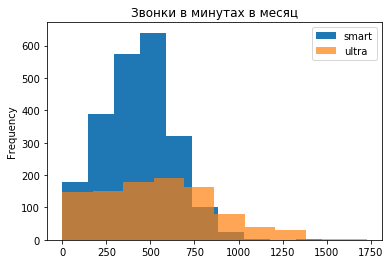

In [265]:
df[df['tariff'] == 'smart']['minutes'].plot(kind='hist', label='smart', bins=10)
df[df['tariff'] == 'ultra']['minutes'].plot(kind='hist', label='ultra', bins=10, alpha=0.7)
plt.legend(loc='upper right')
plt.title('Звонки в минутах в месяц')

#### Анализ данных сообщения
Нормальное распределение определяется средним и дисперсией. Они позволяют понять, насколько шумны данные сейчас.

Text(0.5, 1.0, 'Количество sms в месяц')

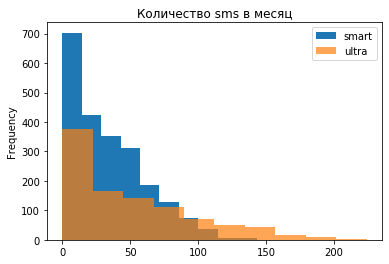

In [266]:
df[df['tariff'] == 'smart']['sms'].plot(kind='hist', label='smart', bins=10)
df[df['tariff'] == 'ultra']['sms'].plot(kind='hist', label='ultra', bins=10, alpha=0.7)
plt.legend(loc='upper right')
plt.title('Количество sms в месяц')

#### Анализ веб-трафика
Нормальное распределение определяется средним и дисперсией. Они позволяют понять, насколько шумны данные сейчас.

Text(0.5, 1.0, 'Расход интернет-трафика в месяц')

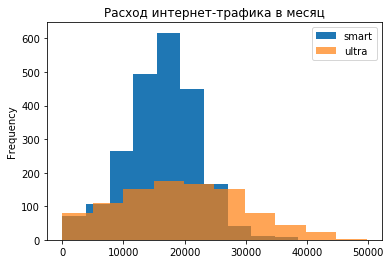

In [267]:
df[df['tariff'] == 'smart']['mb_used'].plot(kind='hist', label='smart', bins=10)
df[df['tariff'] == 'ultra']['mb_used'].plot(kind='hist', label='ultra', bins=10, alpha=0.7)
plt.legend(loc='upper right')
plt.title('Расход интернет-трафика в месяц')

## Описание полученных распределений

#### Анализ данных звонка и минут разговора
Нормальное распределение определяется средним и дисперсией. Они дают вам знать, насколько шумные данные сейчас.

- Пользователи, подключенные к тарифу Smart, тратят около 429 минут в месяц на телефонные звонки. Поскольку тарифный лимит составляет 500 минут разговора, пользователи вписываются в рамки тарифного плана.
- Пользователи, подключенные к тарифному плану Ultra, тратят около 540 минут в месяц на телефонные звонки. Поскольку тарифный лимит составляет 3000 минут разговора, пользователи по-прежнему имеют большую часть минут в пределах тарифа.

#### Анализ данных сообщения
Нормальное распределение определяется средним и дисперсией. Они дают вам знать, насколько шумные данные сейчас.

- Пользователи, подключенные к тарифу Smart, тратят около 33 сообщений в месяц. Поскольку тарифный лимит составляет 50 сообщений, пользователи по-прежнему имеют большую часть неиспользованных сообщений в рамках тарифа.
- Пользователи, подключенные к тарифному плану Ultra, тратят около 49 сообщений в месяц. Поскольку тарифный лимит составляет 1000 сообщений, пользователи по-прежнему имеют большую часть неиспользованных сообщений в рамках тарифа.

#### Анализ веб-трафика
Нормальное распределение определяется средним и дисперсией. Они дают вам знать, насколько шумные данные сейчас.

- Пользователи, подключенные к тарифу Smart, тратят около 16237 МБ = 15 ГБ в месяц. Поскольку тарифный лимит составляет 15 ГБ, пользователи вписываются в рамки тарифного плана.
- Пользователи, подключенные к тарифному плану Ultra, тратят около 19488 МБ = 19 ГБ в месяц. Поскольку тарифный лимит составляет 30 ГБ, пользователи по-прежнему имеют большую часть неиспользованного интернет-трафика в рамках тарифа.

# Проверка гипотез

Мы рассматриваем два основных агрегата - пользователей разных тарифов оператора мобильной связи. Мы проверяем две (двусторонние) гипотезы о равенстве среднего двух популяций из выборок, взятых у них. Чтобы понять, отличаются ли средние доходы пользователей разных тарифов и расчетов, значительна ли разница между средними значениями, проведем статистические тесты.

### Гипотеза 1. Средний доход пользователей по тарифам Ultra и Smart различен

H₀- нулевая гипотеза: 
#### Средний доход по тарифам Ultra и Smart не отличается

H₁ - альтернативная гипотеза:
#### Средний доход для тарифов Ultra и Smart отличается

Порог альфа, критический уровень статистической значимости = 1%.

In [268]:
alpha = .01

results = st.ttest_ind(
    smart_monthly_costs['rub_monthly_fee_total'], 
    ultra_monthly_costs['rub_monthly_fee_total'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Подтверждаем нулевую гипотезу")

p-значение: 6.8954572985407385e-12
Отвергаем нулевую гипотезу


- Получили значение р, равное 6,895;
- Средний доход для тарифов Ultra и Smart не одинаков, поэтому средний доход для пользователей тарифов Ultra и Smart действительно отличается, и наша гипотеза подтвердилась.

### Гипотеза 2. Средний доход пользователей из Москвы отличается от выручки пользователей из других регионов

H₀- нулевая гипотеза:
#### Средняя выручка в Москве не отличается от выручки других регионов

H₁ - альтернативная гипотеза:
#### Средний доход в Москве отличается от доходов из других регионов

Порог альфа, критический уровень статистической значимости = 5%.

In [269]:
df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [270]:
alpha = .05

moscow = df.query("city == 'Москва'")['rub_monthly_fee_total']
other_cities = df.query("city == 'Санкт-Петербург'")['rub_monthly_fee_total']

results = st.ttest_ind(moscow, other_cities)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2599724143101045
Не получилось отвергнуть нулевую гипотезу


- Получили значение р, равное 0,259;
- Средний доход в Москве и Санкт-Петербурге не одинаков, с вероятностью 25% такая разница может быть получена случайно;
- Таким образом, наша гипотеза о том, что средний доход пользователей из Москвы отличается от доходов пользователей из других регионов, не подтвердилась.

# Общий вывод

На основании анализа поведения клиентов федерального оператора сотовой связи Megaline можно сделать следующие выводы:

- Для пользователей тариф Smart более выгоден, поскольку: - Пользователи, подключенные к тарифу Smart, тратят около 429 минут в месяц на телефонные звонки. Поскольку тарифный лимит составляет 500 минут разговора, пользователи вписываются в рамки тарифного плана; - Пользователи, подключенные к тарифу Smart, тратят около 33 сообщений в месяц. Поскольку тарифный лимит составляет 50 сообщений, пользователи по-прежнему имеют большую часть неиспользованных сообщений в рамках тарифа. - Пользователи, подключенные к тарифу Smart, тратят около 16237 МБ = 15 ГБ в месяц. Поскольку тарифный лимит составляет 15 ГБ, пользователи вписываются в рамки тарифного плана.

- Для оператора мобильной связи тариф Ultra более выгоден, поскольку: - Пользователи, подключенные к тарифному плану Ultra, тратят около 540 минут в месяц на телефонные звонки. Так как тарифный лимит составляет 3000 минут разговора, у пользователей все еще есть большая часть минут в пределах тарифа; - Пользователи, подключенные к тарифному плану Ultra, тратят около 49 сообщений в месяц. Поскольку тарифный лимит составляет 1000 сообщений, пользователи по-прежнему имеют большинство неиспользуемых сообщений в рамках тарифа; - Пользователи, подключенные к тарифу Ultra, тратят около 19488 МБ = 19 ГБ в месяц. Поскольку тарифный лимит составляет 30 ГБ, пользователи по-прежнему имеют большую часть неиспользованного интернет-трафика в рамках тарифа. - В целом, у всех пользователей тарифа Ultra всегда есть доля неизрасходованных минут, смс и интернет-трафика. Из двух гипотез была подтверждена только первая: 
средний доход пользователей тарифов Ultra и Smart отличается

#### Рекомендации мобильному оператору:

- Необходимо скорректировать округление / отследить правильность выгрузки знаков с нулевыми значениями в столбцах;
- Обнаженные знания в знаках минут и мб должны быть округлены до 1;
- Необходимо оптимизировать тариф Ultra, так как большинство услуг по этому тарифу остаются свободными.